# Interaction Inference

This notebook walks through the main functionality of the package and provides some background to the biological setting.

## Background

Gene expression is a process that occurs within cells where sections of DNA are 'transcribed' into copies called transcripts that carry information, such as how to produce proteins, to the cell machinery where they are 'translated' into functional products (Or a wide variety of other processes, this is a very simplified explanation [see more here.](https://www.genome.gov/genetics-glossary/Gene-Expression))

However, genes do not act independently and often interact with each other to regulate transcription, forming large and complex 'gene regulatory networks'. The package focuses on the problem of detecting if two genes are interacting given observations of their transcriptional behaviour.

We focus on a simple 'birth-death interaction' model of transcription in the gene pair, a stochastic reaction network (markov chain) where transcripts from each gene, $X_{1}$ and $X_{2}$, are produced (birth), degraded (death) and can regulate each other:

$$ \varnothing \stackrel{k_{tx, 1}}\longrightarrow X_{1} \qquad \varnothing \stackrel{k_{tx, 2}}\longrightarrow X_{2} $$
$$ X_{1} \stackrel{k_{deg, 1}}\longrightarrow \varnothing \qquad X_{2} \stackrel{k_{deg, 2}}\longrightarrow \varnothing $$
$$ X_{1} + X_{2} \stackrel{k_{reg}}\longrightarrow \varnothing $$

Detecting interaction then reduces to testing if a model with interaction strength $k_{reg} > 0$ is consistent with observed data.

## Package overview

This package implements two optimization based methods and a baseline correlation test for inference of interaction from datasets of transcripts. It also contains functions to simulate example datasets from the above 'birth-death interaction' model and to compute + display the classification performance of the methods using the true model parameters.

The optimization methods use the bootstrap to estimate bounds on the distribution of observed transcripts, combining constraints from the model structure to produce an optimization problem over the model parameters. The 'Minimization' approach optimizes a lower bound on the interaction parameter, and if this is found to be > 0 can conclude evidence of interaction. The 'Hypothesis' approach assumes no interaction is present, fixing the parameter = 0, and tests the feasibility of the constraints under this assumption.

# Tutorial

The package centers around a dataset class and classes for inference methods which can each be used with minimal setup, or fine tuned for more control

In [1]:
# import the dataset class
from interaction_inference import Dataset

# import inference method classes
from interaction_inference import Hypothesis, Minimization, Correlation

# import result analysis module
from interaction_inference import results

## Dataset

Create an instance of the dataset class and simulate an example dataset

In [2]:
data = Dataset()

data.simulate_dataset(
    beta=0.9,
    gene_pairs=50,
    cells=1000
)

100%|██████████| 50/50 [04:11<00:00,  5.03s/it]


The parameter beta is the 'capture efficiency' of the observation method, a value of 0.9 means that each transcript in the cell has a 90% chance to be 'captured' by the single-cell-sequencing method used to measure transcript levels. A lower capture efficiency means less information is observed and it is harder to detect interaction, with values often as low as 6%.

The pandas dataframes containing transcript values and model parameters for each gene pair can be saved and loaded as csv files:

In [3]:
data.store_dataset(
    count_dataset_filename="example_transcript_dataset.csv",
    param_dataset_filename="example_parameter_dataset.csv"
)

In [4]:
data.load_dataset(
    count_dataset_filename="example_transcript_dataset.csv",
    param_dataset_filename="example_parameter_dataset.csv",
    beta = 0.9
)

Display a scatter plot of the simulated parameters

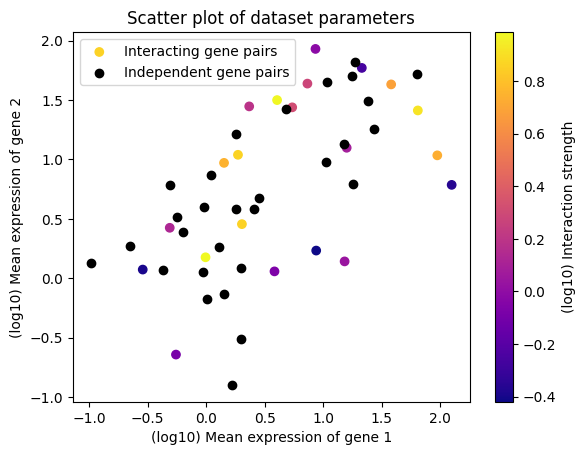

In [5]:
results.scatter_parameters(data)

## Inference

To apply inference methods to a dataset create an instance of its class and pass the dataset object to the analysis method. The default settings for each method should perform well in most cases, but can easily be changed by modifying attributes of the instance.

In [6]:
# instance of hypothesis class
hyp = Hypothesis()

# analyse dataset
hyp.analyse_dataset(data)

100%|██████████| 50/50 [1:06:09<00:00, 79.39s/it] 


In [7]:
# instance of minimization class
minz = Minimization()

# analyse dataset
minz.analyse_dataset(data)

100%|██████████| 50/50 [1:20:38<00:00, 96.76s/it]   


In [8]:
# instance of correlation class
corr = Correlation()

# analyse dataset
corr.analyse_dataset(data)

100%|██████████| 50/50 [00:00<00:00, 88.80it/s]


## Result analysis

The results of analysis are stored as a dictionary in the .result_dict attribute of the method object.

If the true parameters are available (i.e. simulated dataset) the package provides functions to display a scatter plot of the classification into interating vs non-interacting gene pairs, and functions to compute classification performance metrics:

### Scatter plots

Set the detailed argument to False to plot correct / incorrect classification, or set to True for a full breakdown into true / false positives / negatives

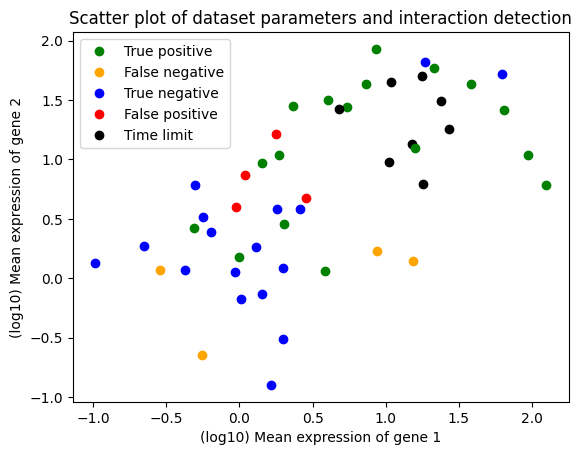

In [15]:
results.scatter_results(hyp, detailed=True)

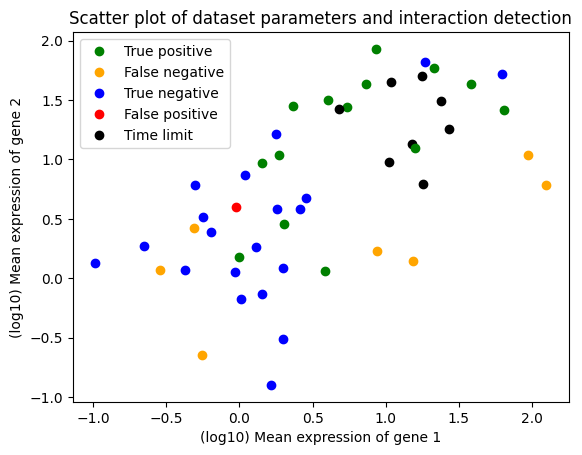

In [16]:
results.scatter_results(minz, detailed=True)

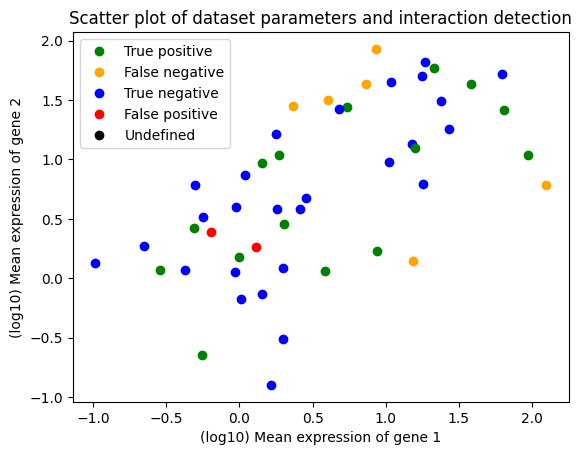

In [17]:
results.scatter_results(corr, detailed=True)

### Performance metrics

Display classification metrics and confusion matrix.

Multiple instances can be passed as arguments e.g. to measure combined performance of a method over multiple datasets

In [12]:
results.classification_performance(hyp)

accuracy = 0.84
precision = 0.81
recall = 0.81
F1 score = 0.81


,Positive,Negative
Predicted Positive,0.34,0.08
Predicted Negative,0.08,0.50


In [13]:
results.classification_performance(minz)

accuracy = 0.84
precision = 0.93
recall = 0.67
F1 score = 0.78


,Positive,Negative
Predicted Positive,0.28,0.02
Predicted Negative,0.14,0.56


In [14]:
results.classification_performance(corr)

accuracy = 0.84
precision = 0.88
recall = 0.71
F1 score = 0.79


,Positive,Negative
Predicted Positive,0.30,0.04
Predicted Negative,0.12,0.54
